<a id="top"></a>

# Cleaning and EDA

---

<a id="home"></a>

This notebook serves as the launching point for the regression analysis of the Ames Housing dataset. All cleaning and basic exploratory data analysis takes place here. 

#### This Notebook
- [Basic EDA](#eda)
- [Feature Selection and Engineering](#viz)
- [Additional Feature Engineering](#features)

#### Other Notebooks
- [Models](modeling.ipynb)
- [Additional Modeling](adtl_modeling.ipynb)
- [Presentation Prep](presentation_prep.ipynb)
- [Predictions Demonstration](predictions_demonstration.ipynb)

### Importing

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id = "eda"> </a>

## Basic EDA
---
- [Back to top](#top)

In [90]:
raw = pd.read_csv("../datasets/train.csv")

In [91]:
raw.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [92]:
raw.shape

(2051, 81)

In [93]:
raw.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [94]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [95]:
#pd.set_option('precision', 2)

In [96]:
raw.isna().sum()[raw.isna().sum() > 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [97]:
round(raw.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474030e+03,8.439800e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.701000e+01,4.282000e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.906000e+01,2.326000e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742490e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.110000e+00,1.430000e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.560000e+00,1.100000e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971710e+03,3.018000e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.104000e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.970000e+01,1.749600e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [98]:
# Changes we make to our DataFrame will not affect the raw data;
# we will always be able to refer back to it just in case.

ames = raw
ames_test = pd.read_csv("../datasets/test.csv")

In [99]:
# Changing the column names to be in a python- and SQL-friendly format

ames = ames.rename(columns = {col:col.lower().replace(" ", "_") for col in ames.columns})
ames_test = ames_test.rename(columns = {col:col.lower().replace(" ", "_") for col in ames_test.columns})

In [100]:
ames.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [101]:
ames_test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

# MAKE A PREDICTION ON EVERY ROW DO NOT DROP ROWS IN TEST CSV

#### Fixing isolated null values

In [102]:
# One house has a garage size and area of NaN. Considering that houses
# in this dataset that do not have garages are recorded as having 
# a size of 0 square feet, this seems like a mistake that can be fixed
# by setting the missing values equal to 0 rather than simply dropping
# the entire row. 

# ames = ames.drop(ames[ames["garage_area"].isna()].index, axis = 0)

ames.loc[ames[ames["garage_area"].isna()].index, "garage_cars"] = 0
ames.loc[ames[ames["garage_area"].isna()].index, "garage_area"] = 0

# Test set is fine in this regard.

# ames_test.loc[ames[ames_test["garage_area"].isna()].index, "garage_cars"] = 0
# ames_test.loc[ames[ames_test["garage_area"].isna()].index, "garage_area"] = 0

In [103]:
# One house has a sinlge NaN. Similar to before, this is just replaced
# with a zero to match other values in the column.

ames.loc[ames[ames["total_bsmt_sf"].isna()].index, "total_bsmt_sf"] = 0

# Fixing the test set

ames_test.loc[ames_test[ames_test["total_bsmt_sf"].isna()].index, "total_bsmt_sf"] = 0

In [104]:
# A few null values that interfere with "Model 2" in linear regression

ames.loc[ames[ames["mas_vnr_area"].isna()].index, "mas_vnr_area"] = 0

ames_test.loc[ames_test[ames_test["mas_vnr_area"].isna()].index, "mas_vnr_area"] = 0

In [105]:
# Fixing null values in the "garage year built" column.
# Instead of replacing the nulls with 0, they are 
# imputed using the median of the column.

# ames["garage_yr_blt"].sort_values(ascending = False)

# Some NaN values and a garage that apparently was built two centuries
# into the future. Rather than impute these NaN values as 0, these values
# are replaced with the median year built.

ames.loc[ames[ames["garage_yr_blt"] > 2010].index, "garage_yr_blt"] = 2010
ames.loc[ames["garage_yr_blt"].isna(), "garage_yr_blt"] = int(ames["garage_yr_blt"].median())

# Fixing the test set

ames_test.loc[ames_test[ames_test["garage_yr_blt"] > 2010].index, "garage_yr_blt"] = 2010
ames_test.loc[ames_test["garage_yr_blt"].isna(), "garage_yr_blt"] = int(ames_test["garage_yr_blt"].median())

In [106]:
# Fixing "lot_frontage". As before, they are imputed with the column mean

# ames["lot_frontage"].sort_values(ascending = True)
# print(ames["lot_frontage"].mean())
# print(ames["lot_frontage"].median())
# print(ames["lot_frontage"].mode())

ames.loc[ames["lot_frontage"].isna(), "lot_frontage"] = ames["lot_frontage"].median()

# Fixing the test set

ames_test.loc[ames_test["lot_frontage"].isna(), "lot_frontage"] = ames_test["lot_frontage"].median()

In [107]:
# Fixing a couple null values in the training set that
# are not an issue in the test set. All values here
# pertain to the basement. Coincidence?

# Replaced with 0

# View the columns to confirm the min value is 0
# ames["bsmtfin_sf_1"].sort_values()
# ames["bsmtfin_sf_2"].sort_values()
# ames["bsmt_unf_sf"].sort_values()
# ames["bsmt_full_bath"].sort_values()
# ames["bsmt_half_bath"].sort_values()

# Replace the value
ames.loc[ames["bsmtfin_sf_1"].isna(), "bsmtfin_sf_1"] = 0
ames.loc[ames["bsmtfin_sf_2"].isna(), "bsmtfin_sf_2"] = 0
ames.loc[ames["bsmt_unf_sf"].isna(), "bsmt_unf_sf"] = 0
ames.loc[ames["bsmt_full_bath"].isna(), "bsmt_full_bath"] = 0
ames.loc[ames["bsmt_half_bath"].isna(), "bsmt_half_bath"] = 0

<a id = "viz"></a>
## Feature Selection and Visualization
---
- [Back to top](#top)

In [108]:
# A quick function to convert a series to its z-scores

def convert_z_score(series):
    return (series - np.mean(series)) / np.std(series)

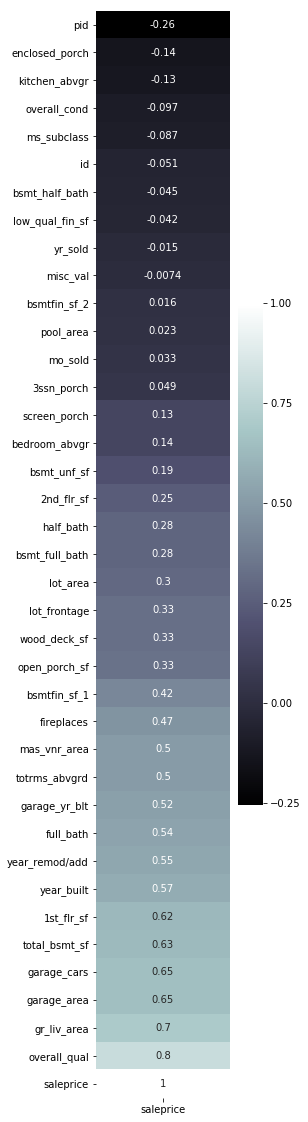

In [109]:
plt.figure(figsize = (3,20))
sns.heatmap(ames.corr()[["saleprice"]].sort_values("saleprice"), cmap = "bone", annot = True);

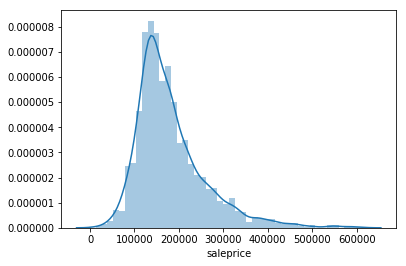

In [110]:
sns.distplot(ames["saleprice"])

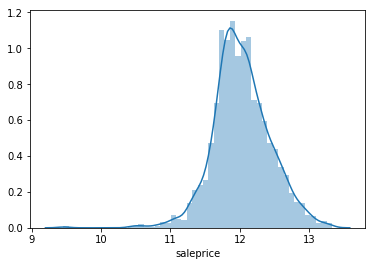

In [111]:
sns.distplot(np.log(ames["saleprice"]))

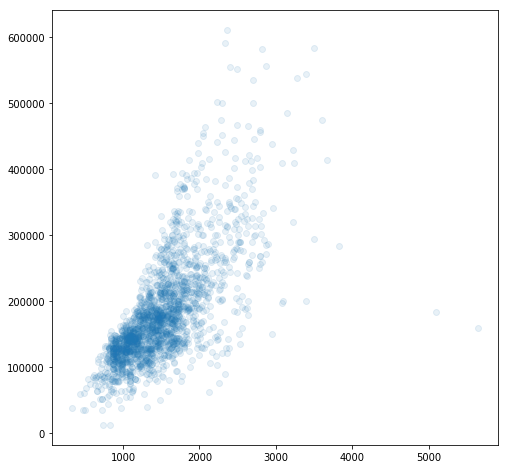

In [112]:
plt.figure(figsize = (8,8))
plt.scatter(ames["gr_liv_area"], ames["saleprice"], alpha = 0.1)

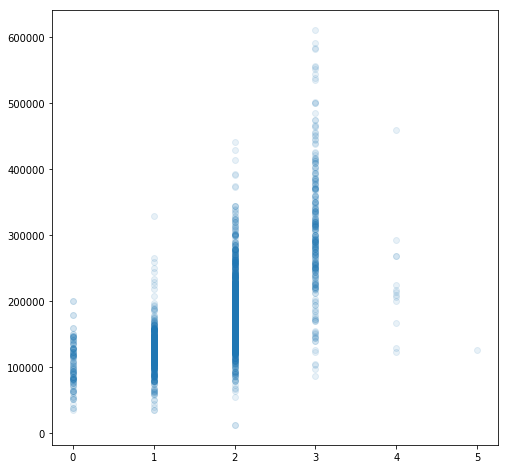

In [113]:
plt.figure(figsize = (8,8))
plt.scatter(ames["garage_cars"], ames["saleprice"], alpha = 0.1)

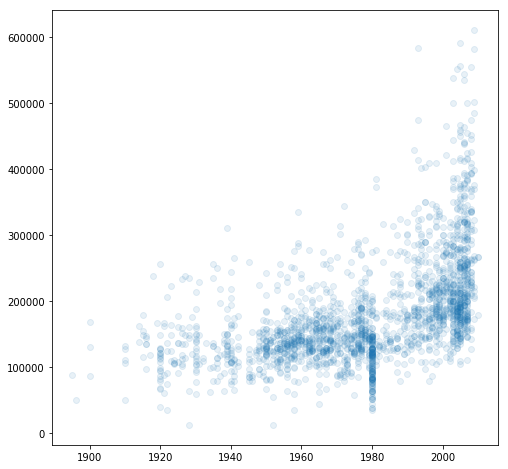

In [114]:
plt.figure(figsize = (8,8))
plt.scatter(ames["garage_yr_blt"], ames["saleprice"], alpha = 0.1)

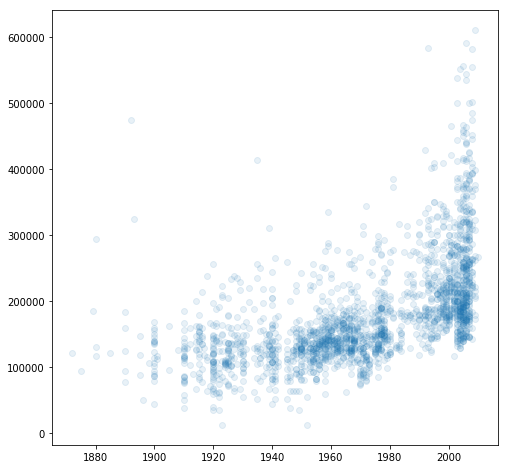

In [115]:
plt.figure(figsize = (8,8))
plt.scatter(ames["year_built"], ames["saleprice"], alpha = 0.1)

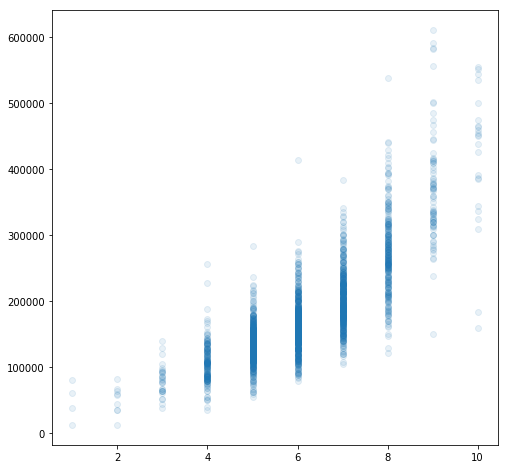

In [116]:
plt.figure(figsize = (8,8))
plt.scatter(ames["overall_qual"], ames["saleprice"], alpha = 0.1)

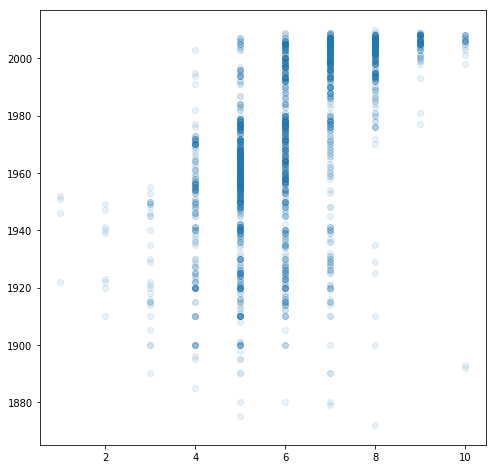

In [117]:
plt.figure(figsize = (8,8))
plt.scatter(ames["overall_qual"], ames["year_built"], alpha = 0.1)

In [118]:
# plt.figure(figsize = (8,8))
# plt.scatter(ames["garage_area_cars"], ames["saleprice"], alpha = 0.1)

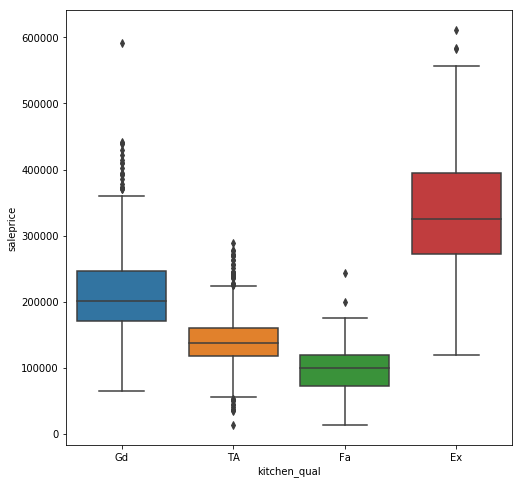

In [119]:
plt.figure(figsize = (8,8))
sns.boxplot(ames["kitchen_qual"], ames["saleprice"])

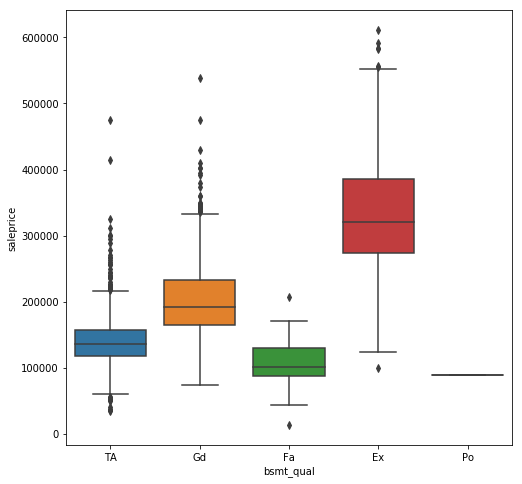

In [120]:
plt.figure(figsize = (8,8))
sns.boxplot(ames["bsmt_qual"], ames["saleprice"])

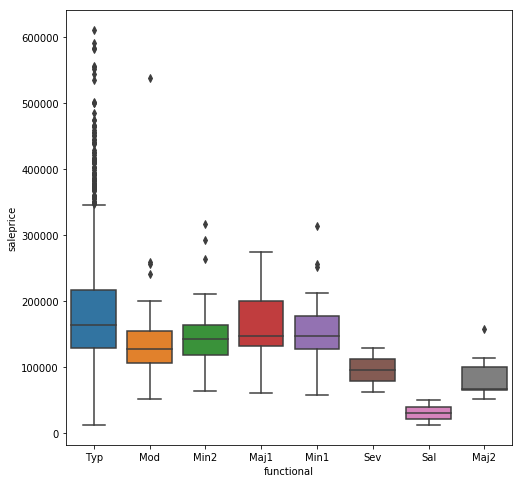

In [121]:
plt.figure(figsize = (8,8))
sns.boxplot(ames["functional"], ames["saleprice"])

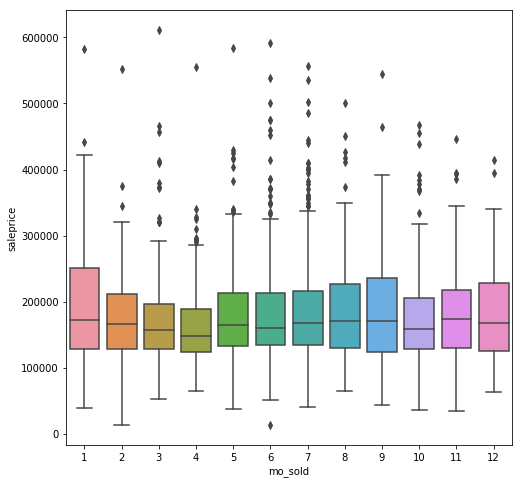

In [122]:
plt.figure(figsize = (8,8))
sns.boxplot(ames["mo_sold"], ames["saleprice"])

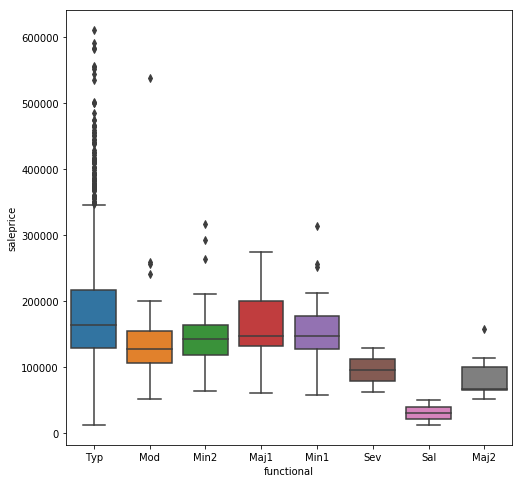

In [123]:
plt.figure(figsize = (8,8))
sns.boxplot(ames["functional"], ames["saleprice"])

<a id = "features"></a>

## Additional Feature Engineering
---

After working with the data for some time in the modeling notebook, I was dissatisfied with the number of features I was leaving out, especially the ordinal and nominal data that I had hitherto left untouched. So I decided to map some numbers to the ordinal data, and create some dummy variables for the categorical data. 

- [Back to top](#top)

In [124]:
ames_plus = ames

In [125]:
# Remove Outliers in the square footage, as per the author's recomendation

ames_plus = ames_plus.drop(ames_plus[ames_plus["gr_liv_area"] > 4000].index)

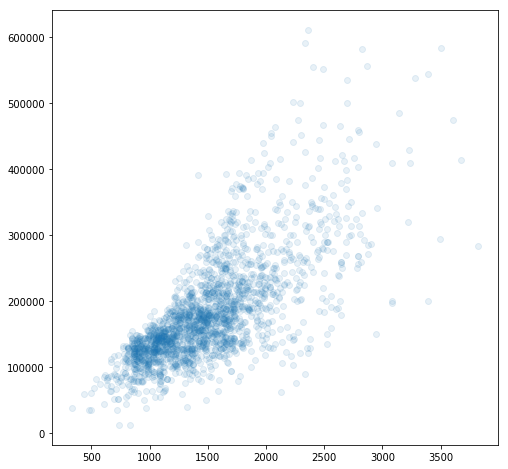

In [126]:
plt.figure(figsize = (8,8))
plt.scatter(ames_plus["gr_liv_area"], ames_plus["saleprice"], alpha = 0.1)

In [127]:
# Add a column that is the total square footage of the house. Multiplication does 
# not work here as an interaction column as some of the houses do not have basements 
# or second floors, and thus a have a square footage of zero. 

ames_plus['total_sq_ft'] = ames_plus['total_bsmt_sf'] + ames_plus['1st_flr_sf'] + ames_plus['2nd_flr_sf']
ames_test['total_sq_ft'] = ames_test['total_bsmt_sf'] + ames_test['1st_flr_sf'] + ames_test['2nd_flr_sf']

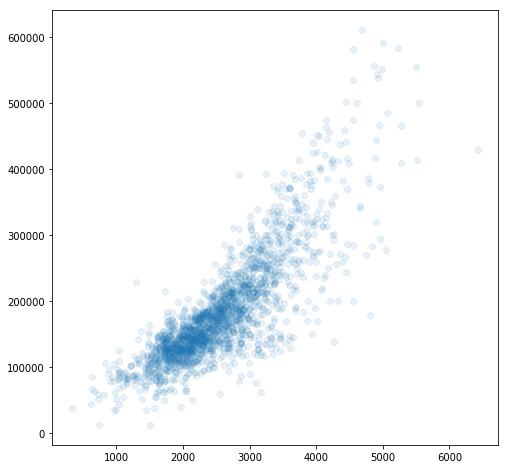

In [128]:
plt.figure(figsize = (8,8))
plt.scatter(ames_plus["total_sq_ft"], ames_plus["saleprice"], alpha = 0.1)

In [129]:
# A few outliers in the lot area column.

ames_plus = ames_plus.drop(ames_plus[ames_plus["lot_area"] > 100_000].index)

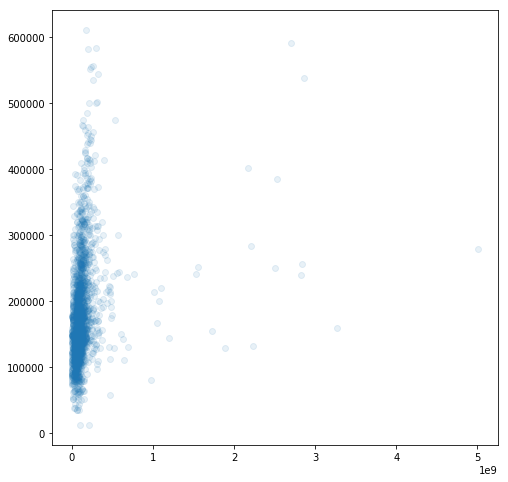

In [130]:
plt.figure(figsize = (8,8))
plt.scatter(ames_plus["lot_area"] ** 2, ames_plus["saleprice"], alpha = 0.1)

In [131]:
# One column for age in years of the house. This column
# these columns will be used in place of year built
# as they are a bit more intuitive to interpret.

ames_plus["age"] = 2010 - ames_plus["year_built"]
ames_plus["age_remod"] = 2010 - ames_plus["year_remod/add"]
ames_plus["age_garage"] = 2010 - ames_plus["garage_yr_blt"]

ames_test["age"] = 2010 - ames_test["year_built"]
ames_test["age_remod"] = 2010 - ames_test["year_remod/add"]
ames_test["age_garage"] = 2010 - ames_test["garage_yr_blt"]

ames_plus = ames_plus.drop(columns = ["year_built", "year_remod/add", "garage_yr_blt"])
# These columns are not dropped from the test dataset;
# explained at the bottom, just before exporting.

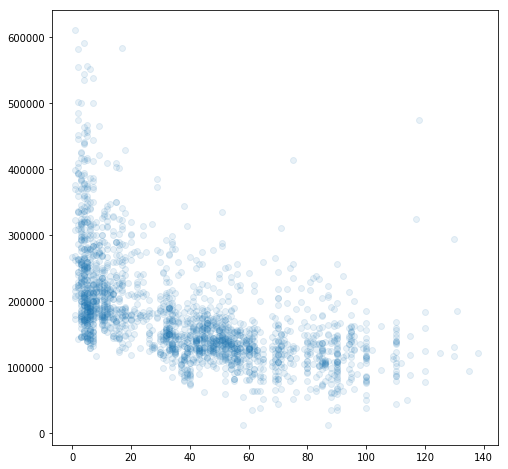

In [132]:
plt.figure(figsize = (8,8))
plt.scatter(ames_plus["age"], ames_plus["saleprice"], alpha = 0.1)

In [133]:
# A few boolean columns. The code for these columns was adapted from this
# Kaggle kernel: https://www.kaggle.com/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa

# Ultimately, I decided to leave these out because I was unsure about plagiarism,
# and they didn't have a huge impact on the results anyways.

# ames_plus["has_basement"] = ames_plus["total_bsmt_sf"].apply(lambda x: 1 if x > 0 else 0)
# ames_plus["has_garage"] = ames_plus["garage_area"].apply(lambda x: 1 if x > 0 else 0)
# ames_plus["has_porch"] = ames_plus["open_porch_sf"].apply(lambda x: 1 if x > 0 else 0)
# ames_plus["has_pool"] = ames_plus["pool_area"].apply(lambda x: 1 if x > 0 else 0)
# ames_plus["remodeled"] = (ames_plus["year_remod/add"] != ames_plus["year_built"]).astype(np.int64)
# ames_plus["new"] = (ames_plus["year_built"] > 2000).astype(np.int64)

# ames_test["has_basement"] = ames_test["total_bsmt_sf"].apply(lambda x: 1 if x > 0 else 0)
# ames_test["has_garage"] = ames_test["garage_area"].apply(lambda x: 1 if x > 0 else 0)
# ames_test["has_porch"] = ames_test["open_porch_sf"].apply(lambda x: 1 if x > 0 else 0)
# ames_test["has_pool"] = ames_test["pool_area"].apply(lambda x: 1 if x > 0 else 0)
# ames_test["remodeled"] = (ames_test["year_remod/add"] != ames_test["year_built"]).astype(np.int64)
# ames_test["new"] = (ames_test["year_built"] > 2000).astype(np.int64)

### Finding the ordinal data and assigning numerical values
---
General flow of the cleaning here is:

- Isolate the columns in question based on a common ordinal descriptor
- Generate a map to change each unique descriptor to a value
- Map the changes and impute nulls
- Check the columns that have been changed
- Repeat with a different set of ordinal columns

In [134]:
# Features defining a condition or quality, eg. "Excellent", "Poor"

ord_list = []

# Grab only the columns of "string" data type
for str_col in ames_plus.dtypes[(ames_plus.dtypes == "object")].index:
    
    # Find all ordinal data (numbers will be assigned)
    if ("Ex" in ames_plus[str_col].unique()) or ("Gd" in ames_plus[str_col].unique()):
        print(str_col, ames_plus[str_col].unique())
        ord_list.append(str_col)

exter_qual ['Gd' 'TA' 'Ex' 'Fa']
exter_cond ['TA' 'Gd' 'Fa' 'Ex' 'Po']
bsmt_qual ['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
bsmt_cond ['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
bsmt_exposure ['No' 'Gd' 'Av' nan 'Mn']
heating_qc ['Ex' 'TA' 'Gd' 'Fa' 'Po']
kitchen_qual ['Gd' 'TA' 'Fa' 'Ex']
fireplace_qu [nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
garage_qual ['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
garage_cond ['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
pool_qc [nan 'Fa' 'Gd' 'Ex' 'TA']


In [135]:
# Defining the numeric values of the ordinal data

qual_map = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "No": 0,
    np.nan: 0,
    
    # Specific to basement exposure column
    "Av": 3,
    "Mn": 2
}

In [136]:
for col in ord_list:
    ames_plus[col] = ames_plus[col].map(qual_map)
    ames_test[col] = ames_test[col].map(qual_map)

In [137]:
ames_plus[ord_list].isna().sum()

exter_qual       0
exter_cond       0
bsmt_qual        0
bsmt_cond        0
bsmt_exposure    0
heating_qc       0
kitchen_qual     0
fireplace_qu     0
garage_qual      0
garage_cond      0
pool_qc          0
dtype: int64

In [138]:
# Finding ordinal data based on unfinished features of the house

ord_list = []

# Grab only the columns of "string" data type
for str_col in ames_plus.dtypes[(ames_plus.dtypes == "object")].index:
    
    # Find all ordinal data (numbers will be assigned)
    if ("Unf" in ames_plus[str_col].unique()):
        print(str_col, ames_plus[str_col].unique())
        ord_list.append(str_col)

bsmtfin_type_1 ['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
bsmtfin_type_2 ['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']
garage_finish ['RFn' 'Unf' 'Fin' nan]


In [139]:
# Defining the numeric values of the ordinal data

qual_map = {
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,   
    "LwQ": 2,
    "Unf": 1,
    np.nan: 0,
    
    # Specific to garage finish
    "Fin": 3,
    "RFn": 2
}

In [140]:
for col in ord_list:
    ames_plus[col] = ames_plus[col].map(qual_map)
    ames_test[col] = ames_test[col].map(qual_map)

In [141]:
ames_plus[ord_list].isna().sum()

bsmtfin_type_1    0
bsmtfin_type_2    0
garage_finish     0
dtype: int64

In [142]:
# A few ordinal features that don't have much in common.
# Referral to the data dictionary was used to find these.

ord_list = ["lot_shape", "utilities", "land_slope", "electrical", "functional", "paved_drive", "fence"]

for str_col in ord_list:
    print(str_col, ames_plus[str_col].unique())

lot_shape ['IR1' 'Reg' 'IR2' 'IR3']
utilities ['AllPub' 'NoSeWa' 'NoSewr']
land_slope ['Gtl' 'Sev' 'Mod']
electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
functional ['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']
paved_drive ['Y' 'N' 'P']
fence [nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


In [143]:
# Defining the numeric values of the ordinal data

qual_map = {
    # lot_shape
    "Reg": 3, "IR1": 2, "IR2": 1, "IR3": 0,
    
    # utilities
    'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, "ELO": 0,
    
    # land_slope
    "Gtl": 2, "Mod": 1, "Sev": 0,
    
    # electrical
    "SBrkr": 4, "FuseA": 3, "FuseF": 2, "FuseP": 1, "Mix": 0,
    
    # functional
    'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0, 
    
    # paved_drive
    "Y": 2, "P": 1, "N": 0,
    
    # fence
    'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, "none": 0,
    
    # NaN values are not filled in with zero:
    # Instead, they are imputed with the most common
    # value. This is because some of these features,
    # most prominently utilities or functional, would
    # be heavily affected by a 0 value. (except in 
    # fence, solved below)
}

In [144]:
for col in ord_list:
    ames_plus[col] = ames_plus[col].map(qual_map)
    ames_plus[col] = ames_plus[col].fillna(ames_plus[col].mode())
    ames_test[col] = ames_test[col].map(qual_map)
    ames_test[col] = ames_test[col].fillna(ames_test[col].mode())

In [145]:
ames_plus["fence"] = ames_plus["fence"].fillna(0)
ames_test["fence"] = ames_test["fence"].fillna(0)

In [146]:
# One single electrical value made it through.
# Mode wasn't working so it was just assumed to have type 4
ames_test["electrical"] = ames_test["electrical"].fillna(4)

In [147]:
ames_plus[ord_list].isna().sum()

lot_shape      0
utilities      0
land_slope     0
electrical     0
functional     0
paved_drive    0
fence          0
dtype: int64

In [148]:
ames_test[ord_list].isna().sum()

lot_shape      0
utilities      0
land_slope     0
electrical     0
functional     0
paved_drive    0
fence          0
dtype: int64

In [149]:
ames_plus.dtypes[ames_plus.dtypes == "object"]

ms_zoning       object
street          object
alley           object
land_contour    object
lot_config      object
neighborhood    object
condition_1     object
condition_2     object
bldg_type       object
house_style     object
roof_style      object
roof_matl       object
exterior_1st    object
exterior_2nd    object
mas_vnr_type    object
foundation      object
heating         object
central_air     object
garage_type     object
misc_feature    object
sale_type       object
dtype: object

### General Fixing of Nulls
---
This is something that I should have fixed a while ago, I'm not sure why it never occured to me earlier. Oh well.

In [150]:
ames_plus.isna().sum()[ames_plus.isna().sum() > 0]

alley           1907
mas_vnr_type      22
garage_type      113
misc_feature    1984
dtype: int64

In [151]:
ames_test.isna().sum()[ames_test.isna().sum() > 0]

alley           821
mas_vnr_type      1
garage_type      44
misc_feature    838
dtype: int64

In [152]:
# Instead of a null alley, the type of alley is set to "none"
ames_plus["alley"] = ames_plus["alley"].fillna("None")
ames_test["alley"] = ames_test["alley"].fillna("None")

# There is already a category for "none" here, so I'm not sure why these are null
ames_plus["mas_vnr_type"] = ames_plus["mas_vnr_type"].fillna("None")
ames_test["mas_vnr_type"] = ames_test["mas_vnr_type"].fillna("None")

# Filling nulls in garage type with "none" as well
ames_plus["garage_type"] = ames_plus["garage_type"].fillna("None")
ames_test["garage_type"] = ames_test["garage_type"].fillna("None")

# And finally, filling empty miscellaneous features with "none"
ames_plus["misc_feature"] = ames_plus["misc_feature"].fillna("None")
ames_test["misc_feature"] = ames_test["misc_feature"].fillna("None")

In [153]:
print(ames_plus["alley"].unique())
print(ames_plus["mas_vnr_type"].unique())
print(ames_plus["garage_type"].unique())
print(ames_plus["misc_feature"].unique())

['None' 'Pave' 'Grvl']
['BrkFace' 'None' 'Stone' 'BrkCmn']
['Attchd' 'Detchd' 'BuiltIn' 'Basment' 'None' '2Types' 'CarPort']
['None' 'Shed' 'TenC' 'Gar2' 'Othr']


In [154]:
ames_plus.isna().sum().sum()

0

In [155]:
ames_test.isna().sum().sum()

0

### Additional Vizualizations
---

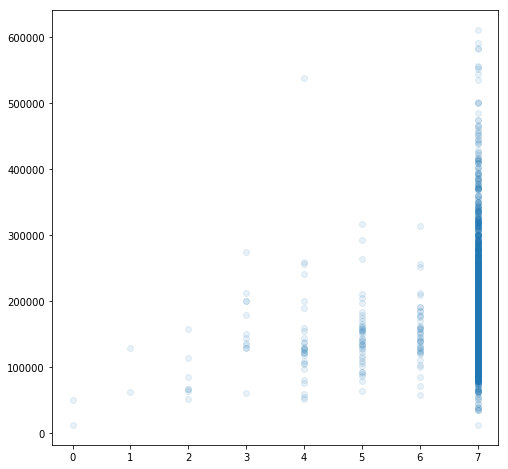

In [156]:
plt.figure(figsize = (8,8))
plt.scatter(ames_plus["functional"], ames_plus["saleprice"], alpha = 0.1)

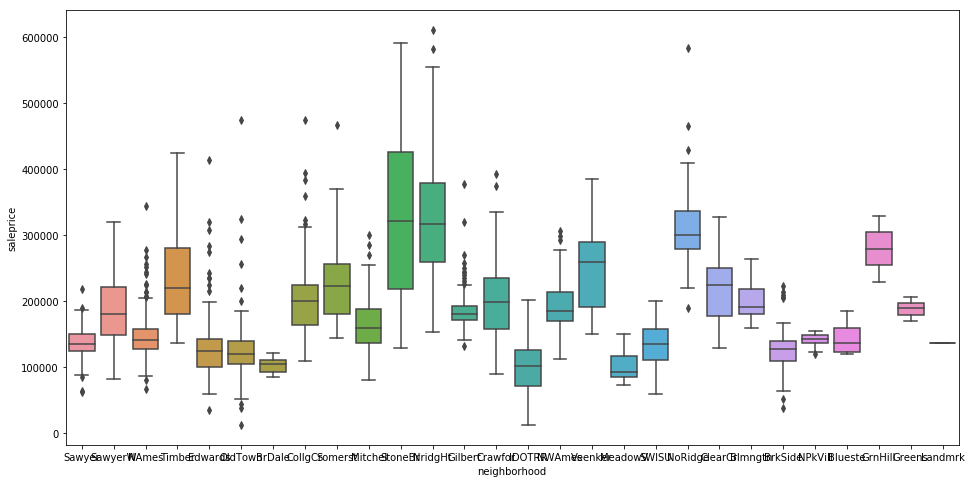

In [157]:
plt.figure(figsize = (16,8))
sns.boxplot(ames["neighborhood"], ames["saleprice"])

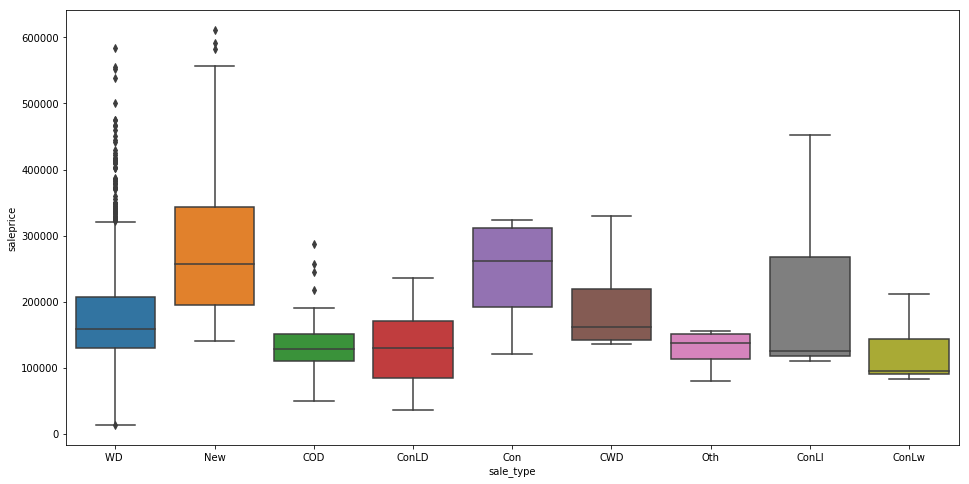

In [158]:
plt.figure(figsize = (16,8))
sns.boxplot(ames["sale_type"], ames["saleprice"])

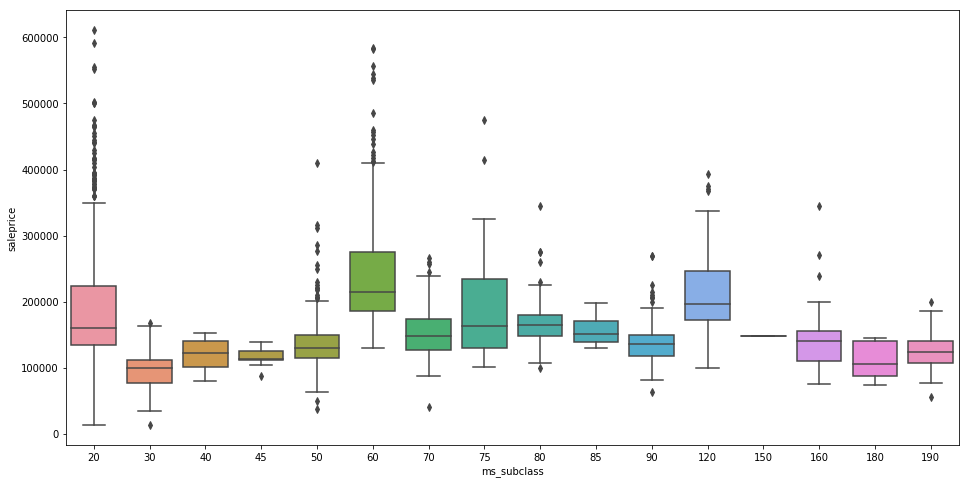

In [159]:
plt.figure(figsize = (16,8))
sns.boxplot(ames["ms_subclass"], ames["saleprice"])

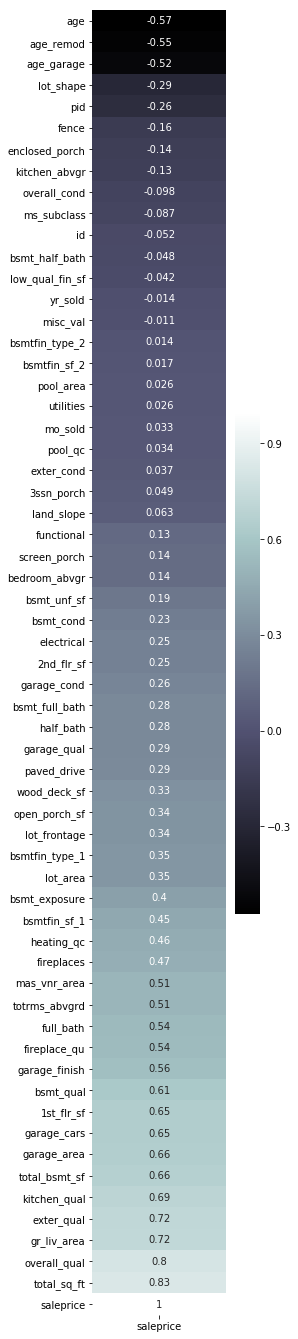

In [160]:
plt.figure(figsize = (3,24))
sns.heatmap(ames_plus.corr()[["saleprice"]].sort_values("saleprice"), cmap = "bone", annot = True);

### MS Subclass

---

This column, while filled with integer data, is actually categorical data. Switching the data types around will allow this column to be converted in dummies in the next step.

In [161]:
ames_plus["ms_subclass"] = ames_plus["ms_subclass"].astype(str)

### Creating dummies

---

I saved this for last as it is going to dramatically increase the size of the data frame

In [162]:
ames_plus.shape

(2047, 82)

In [163]:
ames_test.shape

(879, 84)

In [164]:
# ames_plus = pd.concat([ames_plus, pd.get_dummies(ames_plus["neighborhood"], prefix="neighborhood")], axis=1)
# ames_test = pd.concat([ames_test, pd.get_dummies(ames_test["neighborhood"], prefix="neighborhood")], axis=1)

ames_plus = pd.get_dummies(ames_plus)
ames_test = pd.get_dummies(ames_test)

In [165]:
ames_plus.shape

(2047, 234)

In [166]:
ames_test.shape

(879, 214)

In [167]:
# If a column is in this list it means that a dummy did not get made 
# for that feature (an occurrence of that feature was not in the test.csv)
# If that occurence isn't present, it is safe to put a column of all 0s

missing = [col for col in ames_plus.columns if (col not in ames_test.columns) and (col != "saleprice")]
missing

['ms_subclass_120',
 'ms_subclass_150',
 'ms_subclass_160',
 'ms_subclass_180',
 'ms_subclass_190',
 'ms_subclass_20',
 'ms_subclass_30',
 'ms_subclass_40',
 'ms_subclass_45',
 'ms_subclass_50',
 'ms_subclass_60',
 'ms_subclass_70',
 'ms_subclass_75',
 'ms_subclass_80',
 'ms_subclass_85',
 'ms_subclass_90',
 'ms_zoning_A (agr)',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'condition_2_Artery',
 'condition_2_RRAe',
 'condition_2_RRAn',
 'condition_2_RRNn',
 'roof_matl_Membran',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_Stone',
 'heating_OthW',
 'heating_Wall',
 'misc_feature_TenC']

In [168]:
for col in missing:
    ames_test[col] = [0 for _ in range(ames_test.shape[0])]

In [169]:
# Fixing the same issue for the training data set. 

missing = [col for col in ames_test.columns if (col not in ames_plus.columns)]
missing

['ms_subclass',
 'year_built',
 'year_remod/add',
 'garage_yr_blt',
 'roof_matl_Metal',
 'roof_matl_Roll',
 'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'mas_vnr_type_CBlock',
 'heating_Floor',
 'sale_type_VWD']

In [170]:
for col in missing:
    ames_plus[col] = [0 for _ in range(ames_plus.shape[0])]

In [171]:
ames_plus.shape

(2047, 246)

In [172]:
ames_test.shape

(879, 245)

In [173]:
# these columns are unnecessary for regression analysis as 
# they have no correlation with saleprice and are descriptors
# of the sale and not the house itself, or are invalidated 
# by engineered columns.

ames_plus = ames_plus.drop(columns = ["id", "pid", "mo_sold", "yr_sold"])

# Since the features selected are chosen based on the columns
# from the testing dataset, it is not necessary to drop them from
# the testing dataset. I would drop them anyways but doing so 
# here would interfere with the "modeling.ipynb" notebook.

# ames_test = ames_test.drop(columns = ["mo_sold"])

### Exporting

In [174]:
ames.to_csv("../datasets/ames.csv", index = False)

In [175]:
ames_test.to_csv("../datasets/ames_test.csv", index = False)

In [176]:
ames_plus.to_csv("../datasets/ames_plus.csv", index = False)

---
- [Back to top](#home)
